# 2-Dimensional Thyroid Hormone Regulation Model
_Implmentation of [Yang et al. 2021](https://pubmed.ncbi.nlm.nih.gov/34358537/)_

### Variable Definitions:
 - $U$: euthyroid set point of FT4
 - $\text{TSH}(t)$: plasma concentration of TSH (mU/L)
 - $\text{FT4}(t)$: plasma concentration FT4 (pg/mL)
 - $d_1$, $d_2$: TSH, FT4 auto-proportional decay rate
 - $p_1$: default release rate of TSH... $f(U)=p_1$
 - $p_2(t)$: time dependent FT4 synthesis factor
 - $\frac{1}{s_2+\text{TSH}}$: TSH receptor binding term
 - $f(\text{FT4})$: TSH secretion dependent on FT4
    - $f(\text{FT4}) = p_1 - \frac{p_1(\text{FT4}-U)}{s_1+\text{FT4}} = p_1\frac{s_1+U}{s_1+\text{FT4}}$
 - $G$: Treatment dependent variable, potentially also time dependent

### ODEs
1. $\frac{\text{dTSH}(t)}{\text{d}t} = p_1 - \frac{p_1(\text{FT4}-U)}{s_1+\text{FT4}} - d_1\text{TSH}$<br><br>
2. $\frac{\text{dFT4}(t)}{\text{d}t} = \frac{p_2(t)\text{TSH}}{s_2+\text{TSH}}-d_2\text{FT4}+G$<br><br>

In [1]:
using DifferentialEquations
using Plots

In [9]:
#Initialize parameters

function initialize_Fig2()

    U= 12.5 #1
    TSH_0= 30 #2
    FT4_0= 1 #3
    d1= 16.6355 #4
    d2= 0.099021 #5
    s1= 0.0434 #6
    s2= 0.0021 #7
    p1= 50 #8
    p2= d2*U*(1+(d1*s2)/p1) #9

    ICs= [U,TSH_0,FT4_0,d1,d2,s1,s2,p1,p2]

end

function plot_model(sol)

    plot(sol.t,[sol[2,:],sol[3,:]],label=["TSH (mU/L)" "FT4 (pg/mL)"])
    xlabel!("Time (days)")
    ylabel!("TSH and FT4")
    xlims!(0, 300)
    ylims!(0,30)
end

function euthyroid_model!(d,ICs,p,t)

    d[2]= ICs[8]-(ICs[8]*(ICs[3]-ICs[1]))/(ICs[6]+ICs[3])-ICs[4]*ICs[2] #TSH
    d[3]= (ICs[9]*ICs[2])/(ICs[7]+ICs[2])-ICs[5]*ICs[3] #FT4

end


euthyroid_model! (generic function with 1 method)

In [10]:
u0 = initialize_Fig2()
tspan = (0.0,300.0)
prob = ODEProblem(euthyroid_model!,u0,tspan)
sol = solve(prob,saveat=1);

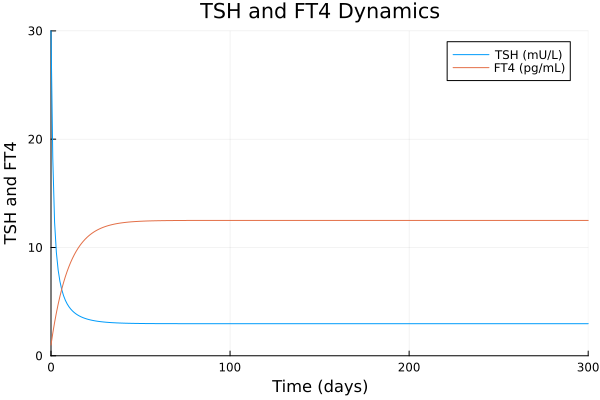

In [12]:
plot_model(sol)